# Neural Network from Scratch

This notebook is a simple implementation of a neural network from scratch. The
purpose of this notebook is to understand the working of a neural network and to
understand the mathematics behind it.


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# You can download the MNIST datasets here:
# https://pjreddie.com/projects/mnist-in-csv/
# Make sure you save this to the root `data` directory.

data = pd.read_csv('../data/mnist_train.csv')
data.head()

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
# convert the data to numpy array
data = np.array(data)

# m = number of examples, n = number of features (pixels) +1 for the label
m, n = data.shape 

# shuffle the data
np.random.shuffle(data)

# T = transpose the data (each column of the matrix is a different example)
# transposition allows easy separation of the labels and the features using
# slicing syntax

data_dev = data[:1000].T 
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.


data_train = data[1000:].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

Our NN will have a simple two-layer architecture. Input layer $a^{[0]}$ will
have 784 units corresponding to the 784 pixels in each 28x28 input image. A
hidden layer $a^{[1]}$ will have 10 units with ReLU activation, and finally our
output layer $a^{[2]}$ will have 10 units corresponding to the ten digit classes
with softmax activation.

| Variable | Description           |
| -------- | --------------------- |
| $a$      | Input                 |
| $Z$      | Linear transformation |
| $A$      | Activation            |
| $W$      | Weights               |
| $B$      | Bias                  |
| $g$      | Activation function   |
| $d$      | Derivative            |
| $m$      | Number of samples     |
| $\Sigma$ | Summation             |
| $\alpha$ | Learning rate         |
| $dW$     | Weight derivative     |
| $dB$     | Bias derivative       |

**Forward propagation**

| Formula                                 | Description                           |
| --------------------------------------- | ------------------------------------- |
| $Z^{[1]} = W^{[1]} X + b^{[1]}$         | Linear transformation of input        |
| $A^{[1]} = g_{\text{ReLU}}(Z^{[1]})$    | Activation of hidden layer            |
| $Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]}$   | Linear transformation of hidden layer |
| $A^{[2]} = g_{\text{softmax}}(Z^{[2]})$ | Activation of output layer            |

**Backward propagation**

| Formula                                                   | Description                        |
| --------------------------------------------------------- | ---------------------------------- |
| $dZ^{[2]} = A^{[2]} - Y$                                  | Output layer error                 |
| $dW^{[2]} = \frac{1}{m} dZ^{[2]} A^{[1]T}$                | Weight derivative for output layer |
| $dB^{[2]} = \frac{1}{m} \Sigma {dZ^{[2]}}$                | Bias derivative for output layer   |
| $dZ^{[1]} = W^{[2]T} dZ^{[2]} .* g^{[1]\prime} (z^{[1]})$ | Hidden layer error                 |
| $dW^{[1]} = \frac{1}{m} dZ^{[1]} A^{[0]T}$                | Weight derivative for hidden layer |
| $dB^{[1]} = \frac{1}{m} \Sigma {dZ^{[1]}}$                | Bias derivative for hidden layer   |

**Parameter updates**

| Formula                                | Description                     |
| -------------------------------------- | ------------------------------- |
| $W^{[2]} := W^{[2]} - \alpha dW^{[2]}$ | Update weights for output layer |
| $b^{[2]} := b^{[2]} - \alpha db^{[2]}$ | Update bias for output layer    |
| $W^{[1]} := W^{[1]} - \alpha dW^{[1]}$ | Update weights for hidden layer |
| $b^{[1]} := b^{[1]} - \alpha db^{[1]}$ | Update bias for hidden layer    |

**Vars and shapes**

Forward prop

| Var       | Shape                                     | Description                                                           |
| --------- | ----------------------------------------- | --------------------------------------------------------------------- |
| $A^{[0]}$ | 784 x m ($= X$)                           | Input (image)                                                         |
| $Z^{[1]}$ | 10 x m ($\sim A^{[1]}$)                   | Linear transformation of input (Measuring the strength of each input) |
| $W^{[1]}$ | 10 x 784 ($W^{[1]} A^{[0]} \sim Z^{[1]}$) | Weights for hidden layer (How much each input affects the next)       |
| $B^{[1]}$ | 10 x 1                                    | Bias for hidden layer (A constant added to each input)                |
| $Z^{[2]}$ | 10 x m ($\sim A{[2]}$)                    | Linear transformation of hidden layer                                 |
| $W^{[2]}$ | 10 x 10 ($W^{[2]} A^{[1]} \sim Z^{[2]}$)  | Weights for output layer                                              |
| $B^{[2]}$ | 10 x 1                                    | Bias for output layer                                                 |

Backprop

| Var        | Shape               | Description                                                        |
| ---------- | ------------------- | ------------------------------------------------------------------ |
| $dZ^{[2]}$ | 10 x m ($~A^{[2]}$) | Output layer error                                                 |
| $dW^{[2]}$ | 10 x 10             | Weight derivative for output layer (change in weights for output)  |
| $dB^{[2]}$ | 10 x 1              | Bias derivative for output layer (change in bias for output layer) |
| $dZ^{[1]}$ | 10 x m ($~A^{[1]}$) | Hidden layer error (error in the hidden layer)                     |
| $dW^{[1]}$ | 10 x 10             | Weight derivative for hidden layer (change in weights for hidden)  |
| $dB^{[1]}$ | 10 x 1              | Bias derivative for hidden layer (change in bias for hidden layer) |


In [3]:
# check out the shapes
print(X_train.shape, Y_train.shape)
# (784 = 28*28 pixels, 58999 = 60000 - 1000 test examples)

(784, 58999) (58999,)


In [4]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [15]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 50 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            # calc accuracy as a percentage
            accuracy = round(get_accuracy(predictions, Y) * 100, 2) 
            print("Accuracy:", accuracy, "%")
    return W1, b1, W2, b2

In [16]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.20, 500)

Iteration:  0
[2 8 2 ... 8 2 3] [1 4 3 ... 7 1 0]
accuracy: 11.4 %
Iteration:  50
[1 4 2 ... 8 1 0] [1 4 3 ... 7 1 0]
accuracy: 66.14 %
Iteration:  100
[1 4 2 ... 7 1 0] [1 4 3 ... 7 1 0]
accuracy: 77.45 %
Iteration:  150
[1 4 2 ... 7 1 0] [1 4 3 ... 7 1 0]
accuracy: 81.67 %
Iteration:  200
[1 4 2 ... 7 1 0] [1 4 3 ... 7 1 0]
accuracy: 83.79 %
Iteration:  250
[1 4 2 ... 7 1 0] [1 4 3 ... 7 1 0]
accuracy: 85.15 %
Iteration:  300
[1 4 2 ... 7 1 0] [1 4 3 ... 7 1 0]
accuracy: 86.11 %
Iteration:  350
[1 4 2 ... 7 1 0] [1 4 3 ... 7 1 0]
accuracy: 86.8 %
Iteration:  400
[1 4 2 ... 7 1 0] [1 4 3 ... 7 1 0]
accuracy: 87.39 %
Iteration:  450
[1 4 2 ... 7 1 0] [1 4 3 ... 7 1 0]
accuracy: 87.83 %


In [17]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Let's look at a couple of examples:

Prediction:  [1]
Label:  1


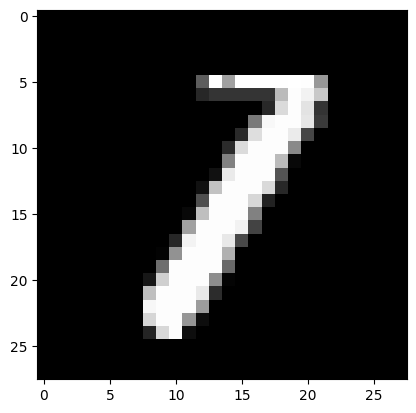

Prediction:  [4]
Label:  4


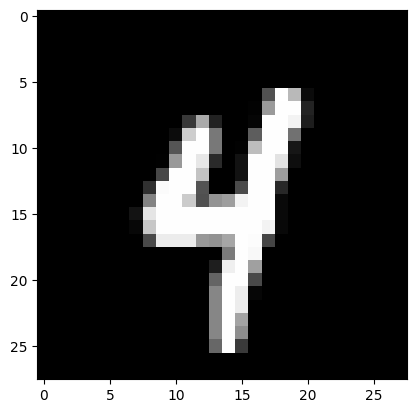

Prediction:  [2]
Label:  3


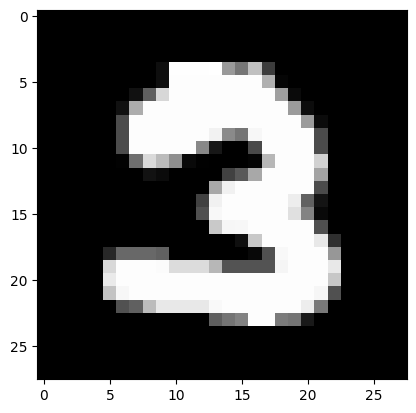

Prediction:  [5]
Label:  3


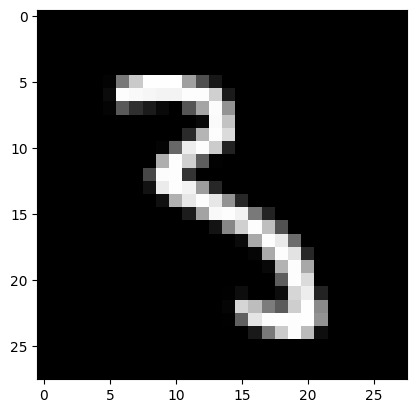

In [18]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

Finally, let's find the accuracy on the dev set:

In [19]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[0 7 1 1 7 1 8 0 3 7 8 7 4 8 0 7 3 7 3 2 7 2 2 0 9 3 0 2 4 4 2 6 6 7 1 7 8
 1 3 0 0 7 6 8 2 8 4 4 3 5 6 7 4 2 2 0 6 6 6 0 0 3 4 3 4 2 7 8 2 2 8 6 7 3
 7 0 2 3 9 8 4 6 1 9 3 8 8 1 2 9 0 3 1 1 4 8 6 7 7 6 8 2 4 6 5 3 5 4 1 2 5
 4 9 0 3 7 3 9 8 6 3 0 3 7 3 3 1 9 2 1 7 3 9 4 2 4 7 2 4 8 4 3 1 9 7 4 5 8
 2 9 3 5 5 8 1 2 7 3 5 2 5 4 8 5 1 2 0 8 1 6 8 1 8 0 1 8 8 9 3 1 0 8 3 7 2
 9 7 5 0 5 2 3 5 7 8 7 9 4 1 0 9 0 5 7 4 3 7 6 8 9 8 0 2 9 4 2 9 7 9 0 6 9
 1 6 4 5 6 6 1 5 6 4 4 9 1 2 5 6 6 4 2 3 1 1 4 1 6 6 3 8 0 2 0 3 9 7 1 6 7
 6 3 7 6 9 4 1 3 2 2 3 7 3 3 3 8 5 7 1 9 6 4 7 4 2 4 8 4 3 2 7 6 5 5 5 1 4
 8 3 3 0 6 6 0 0 3 2 6 5 5 6 1 4 8 8 9 7 0 0 4 6 1 4 0 7 3 0 6 2 0 2 3 0 7
 6 7 9 9 5 7 0 7 5 2 9 5 2 3 9 6 5 5 7 5 7 6 7 3 3 1 9 2 7 6 3 1 1 2 2 8 4
 5 7 8 4 2 7 4 6 6 1 6 8 6 5 2 2 4 3 7 8 7 4 1 8 3 0 6 2 7 2 6 5 5 2 1 7 8
 4 8 1 9 4 2 9 3 1 5 4 1 8 8 3 9 8 5 2 4 8 9 2 3 6 8 4 6 3 2 7 0 9 1 4 1 6
 8 7 4 9 6 0 5 6 9 4 1 1 0 3 2 0 7 2 1 1 3 4 6 4 3 2 8 2 0 6 7 1 0 8 2 1 3
 3 9 2 2 3 6 8 0 7 3 3 5 

0.86

[Source tutorial](https://www.youtube.com/watch?v=w8yWXqWQYmU)